# Notebook1

In [2]:
#import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

Now, we load the data that was found in the Kaggle dataset.

In [3]:
#read the csv file
df = pd.read_csv('cardata.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.shape

(301, 9)

Description:
    
    0.Car_Name: The name or model of the car being sold.
    1.Year: The manufacturing year of the car.
    2.Selling_Price: The price at which the car is being sold in Indian currency.
    3.Present_Price: The current market price of the car in Indian currency.
    4.Kms_Driven: The total distance the car has been driven since its purchase.
    5.Fuel_Type: The type of fuel used by the car (Petrol, Diesel, CNG). 
    6.Seller_Type: Indicates whether the seller is an individual or a dealer.
    7.Transmission: The type of transmission in the car (Manual, Automatic).
    8.Owner: The number of previous owners the car has had.

This dataset contains the information about cars in India. There are 9 columns and 301 rows in total. The columns have different datatypes and we need to adjust them for modelling purpose. There are no non-null rows but still we should check for any duplicates. The prices in the dataset are in Indian currency, and we will convert them to Euro.

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

We are checking any missing values in the dataframe and we do not have null values in any of the columns.

In [7]:
#drop duplicates
df=df.drop_duplicates()

# Analyzing the Data

<Axes: xlabel='Class', ylabel='Frequency'>

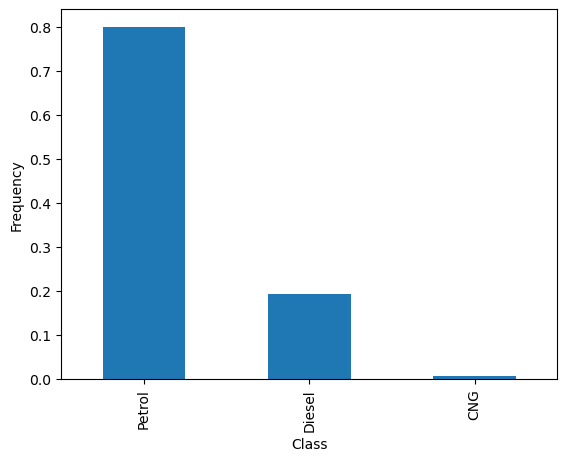

In [8]:
df['Fuel_Type'].value_counts(normalize=True).plot(kind='bar', xlabel='Class', ylabel='Frequency')

This bar chart shows the percentages of each fuel type used by the cars.

Petrol is the most common fuel type with a value of almost 80 percent. Diesel comes next with a value of around 20 percent. CNG is the least common fuel type with only approximately 1 percent.

<Axes: xlabel='Class', ylabel='Frequency'>

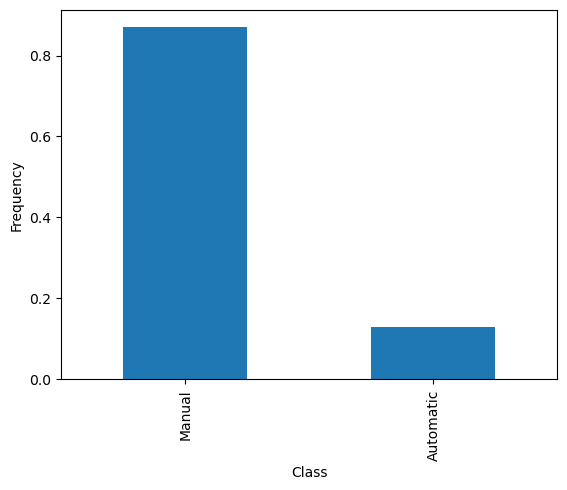

In [9]:
df['Transmission'].value_counts(normalize=True).plot(kind='bar',xlabel='Class',ylabel='Frequency')

In this bar chart, we see the distribution of transmission type. Manual is the most common around 85 percent. On the other hand, automatic transmission is not common compare to manual. It is only around 15 percent.

<Axes: xlabel='Class', ylabel='Frequency'>

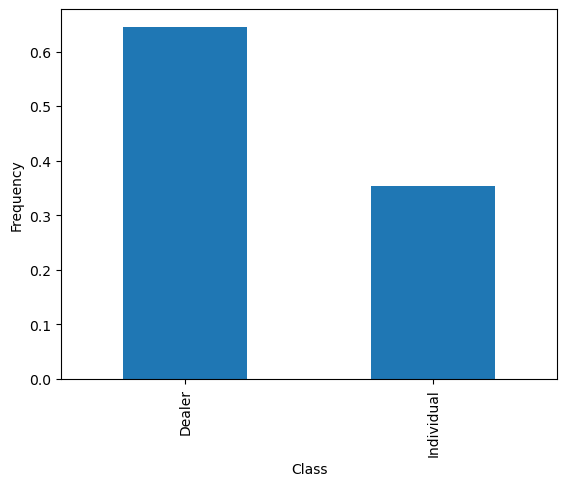

In [10]:
df['Seller_Type'].value_counts(normalize=True).plot(kind='bar',xlabel='Class',ylabel='Frequency')

This bar chart shows the distribution of different seller types for the cars. In the dataset, it is clear that almost 65 percent of the cars are sold by dealers, while around 35 percent are sold by individual sellers.

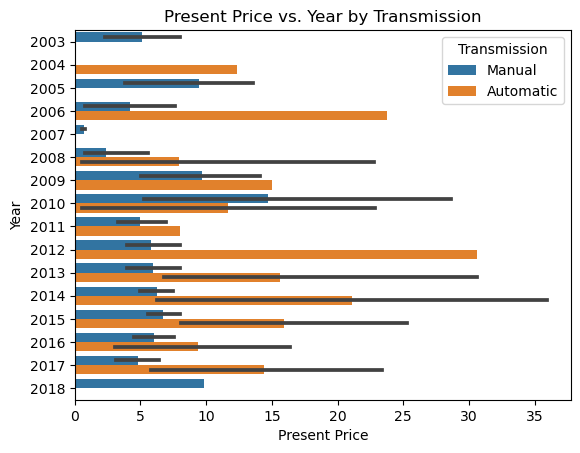

In [11]:
sns.barplot(x='Present_Price', y='Year', data=df, hue='Transmission', orient='h')
plt.xlabel('Present Price')
plt.ylabel('Year')
plt.title('Present Price vs. Year by Transmission')
plt.legend(title='Transmission', loc='upper right')
plt.show()

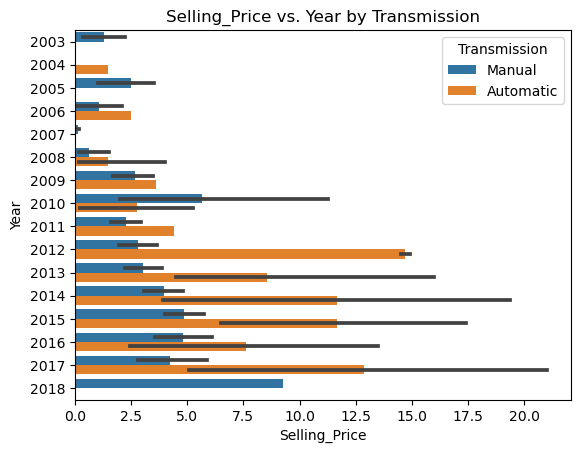

In [12]:
sns.barplot(x='Selling_Price', y='Year', data=df, hue='Transmission', orient='h')
plt.xlabel('Selling_Price')
plt.ylabel('Year')
plt.title('Selling_Price vs. Year by Transmission')
plt.legend(title='Transmission', loc='upper right')
plt.show()

We can compare the selling and present prices by transmission using these two graphs. Firstly, we notice a significant price difference between manual and automatic cars. Also, the price gap is bigger in automatic cars compare to manual cars. In 2017, an automatic car was sold for over 20, making it the most expensive car in our dataset. Lastly, there is no so much difference between the selling and present prices which is important to see for our prediction model

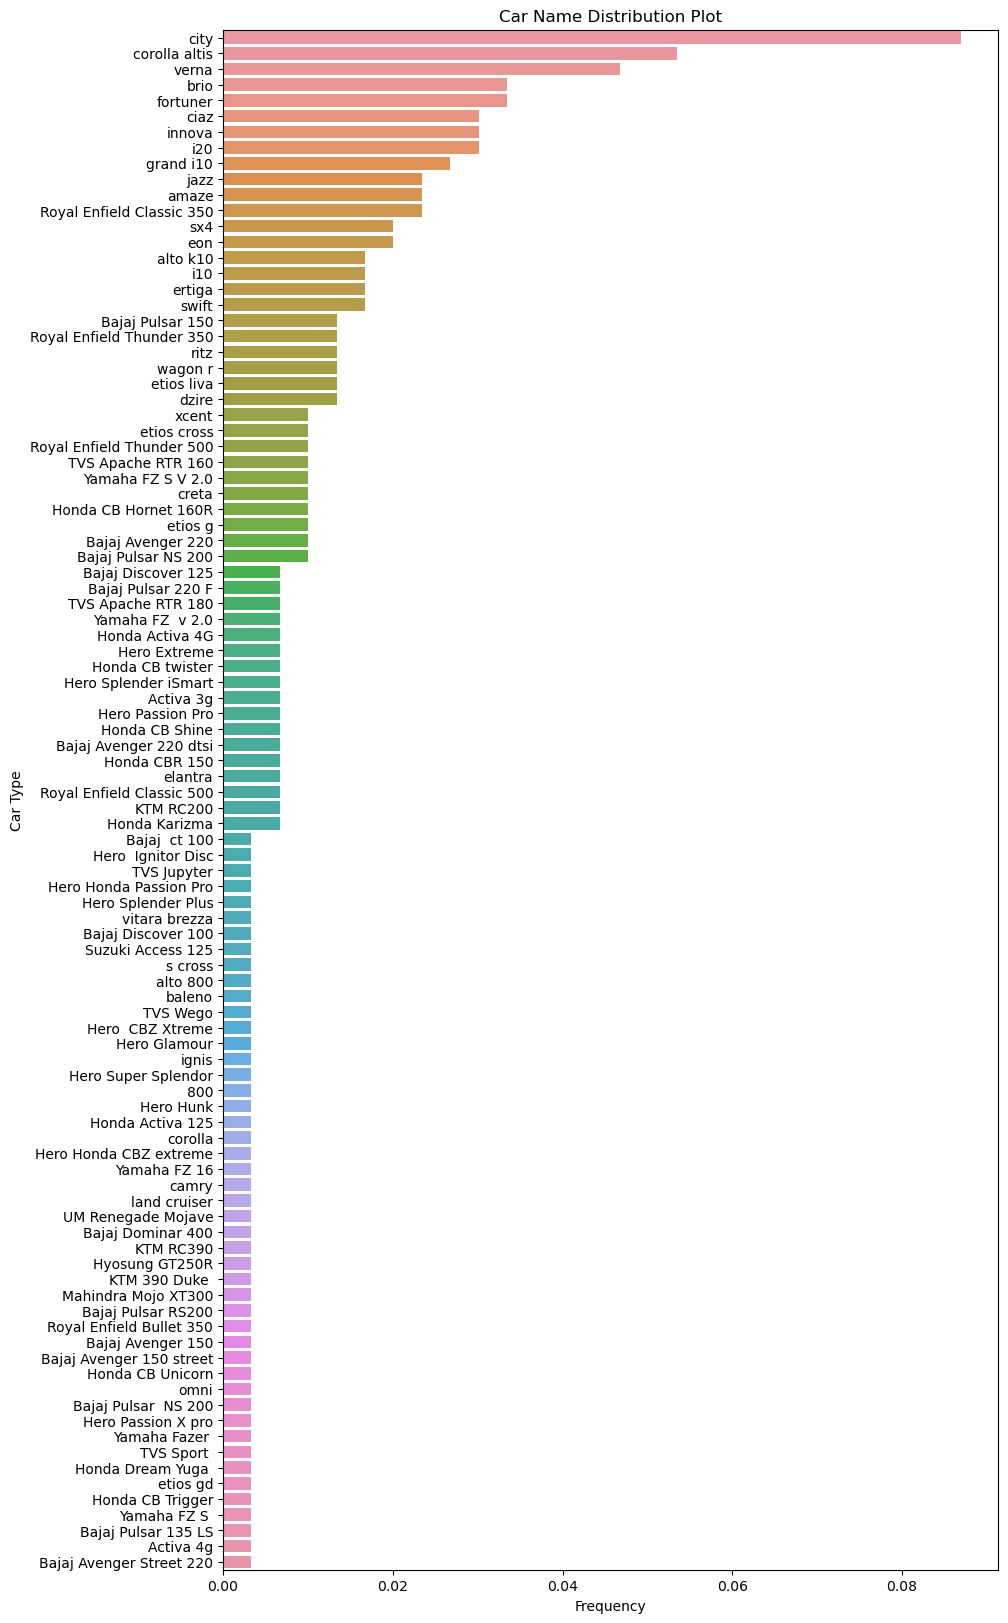

In [13]:
plt.figure(figsize=(10, 20))
sns.barplot(y=df['Car_Name'].value_counts(normalize=True).index, x=df['Car_Name'].value_counts(normalize=True), orient='h')
plt.xlabel('Frequency')
plt.ylabel('Car Type')
plt.title('Car Name Distribution Plot')
plt.show()

We can see the distribution of cars in our data. Overall, we have a wide variety of different cars. The city car has the highest frequency with a value of 8 percent. Most cars appears only once or twice in the data.

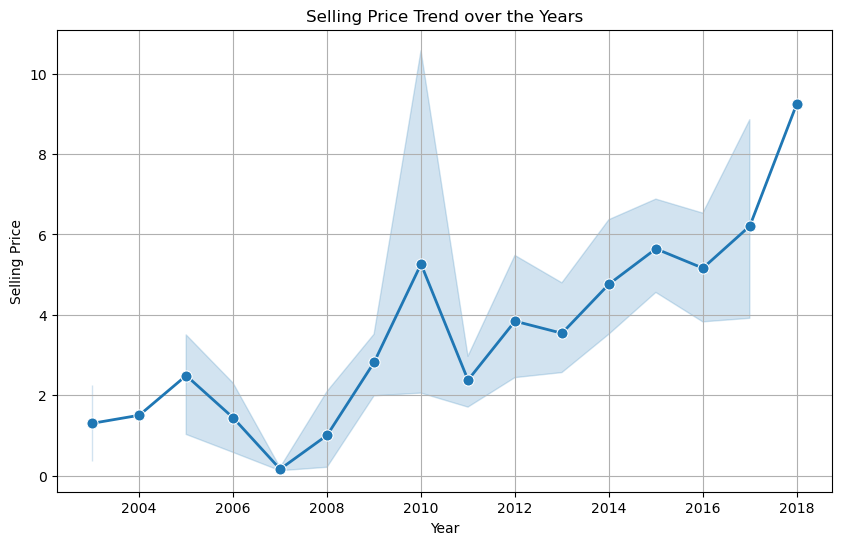

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Selling_Price", data=df, marker='o', markersize=8, linewidth=2)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price Trend over the Years')
plt.grid(True)
plt.show()

We can abserve the selling trends between 2003 and 2018. In the beginning, it was steady but we can see a sharp rise from the start of 2007 until 2010. After a small decrease in 2011, there has been another increase in selling price until 2018.

Our data is based on the Indian currency. When I search the reason, I found that there has been a loss in the currency's value over the years. I believe these decreases affect the prices and leading people to sell their cars more expensive.